In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [6]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
df.shape

(1000, 9)

In [11]:
df.isnull().any()

,0
Transaction ID,False
Date,False
Customer ID,False
Gender,False
Age,False
Product Category,False
Quantity,False
Price per Unit,False
Total Amount,False


In [12]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [13]:
# Find unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Customer ID: 1000 unique values
Gender: 2 unique values
Product Category: 3 unique values


In [56]:
for col in df.select_dtypes(include=['int64']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Transaction ID: 1000 unique values
Age: 47 unique values
Quantity: 4 unique values
Price per Unit: 5 unique values
Total Amount: 18 unique values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# Descriptive Analysis

In [14]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


#Time Series Analysis

In [32]:
!pip install matplotlib

In [33]:
!pip install statsmodels

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


In [35]:
data = pd.read_csv('/content/retail_sales_dataset.csv', parse_dates=['Date'], index_col='Date')

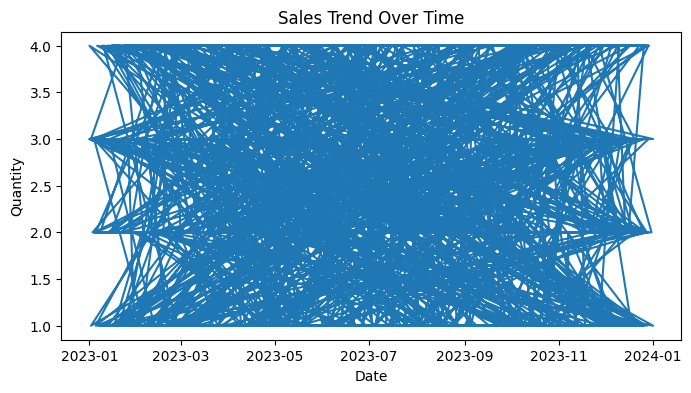

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(data.index, data['Quantity'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

In [37]:
# Resample to monthly granularity
monthly_data = data['Quantity'].resample('ME').sum()

In [38]:
rolling_avg_monthly = monthly_data.rolling(window=3).mean()

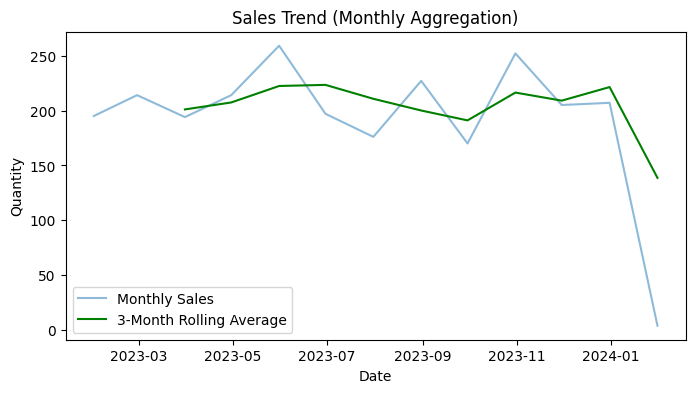

In [39]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_data.index, monthly_data.values, label='Monthly Sales', alpha=0.5)
plt.plot(rolling_avg_monthly.index, rolling_avg_monthly.values, label='3-Month Rolling Average', color='green')
plt.title('Sales Trend (Monthly Aggregation)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [40]:
weekly_data = data['Quantity'].resample('W').sum()

In [41]:
rolling_avg_weekly = weekly_data.rolling(window=7).mean()

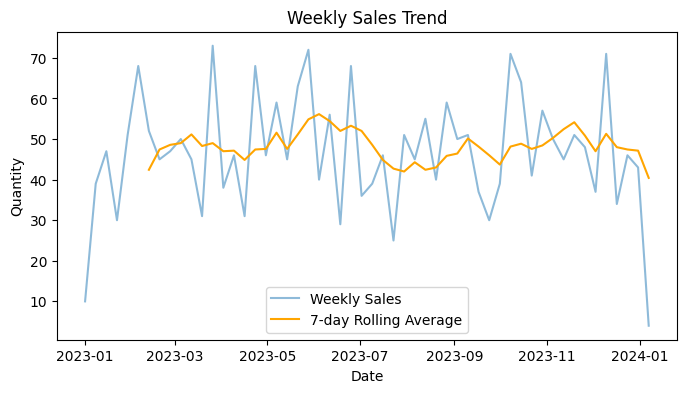

In [42]:
plt.figure(figsize=(8, 4))
plt.plot(weekly_data.index, weekly_data.values, label='Weekly Sales', alpha=0.5)
plt.plot(rolling_avg_weekly.index, rolling_avg_weekly.values, label='7-day Rolling Average', color='orange')
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

##Customer Demographics Analysis

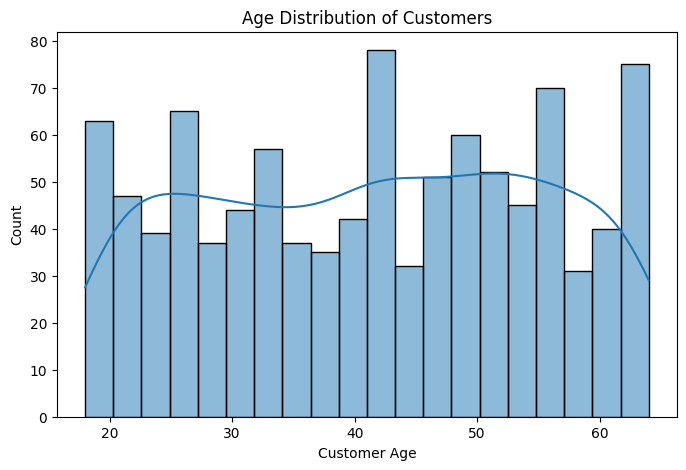

In [43]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.title("Age Distribution of Customers")
plt.show()

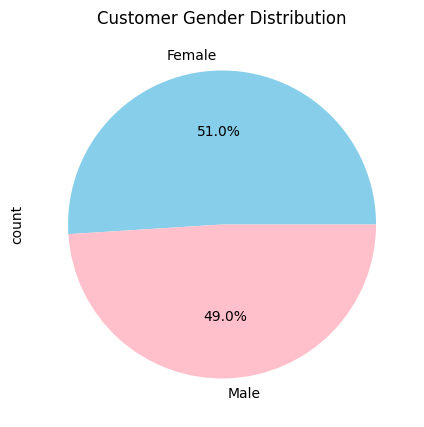

In [44]:
plt.figure(figsize=(5,5))
df["Gender"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title("Customer Gender Distribution")
plt.show()

##Purchasing Behavior Analysis

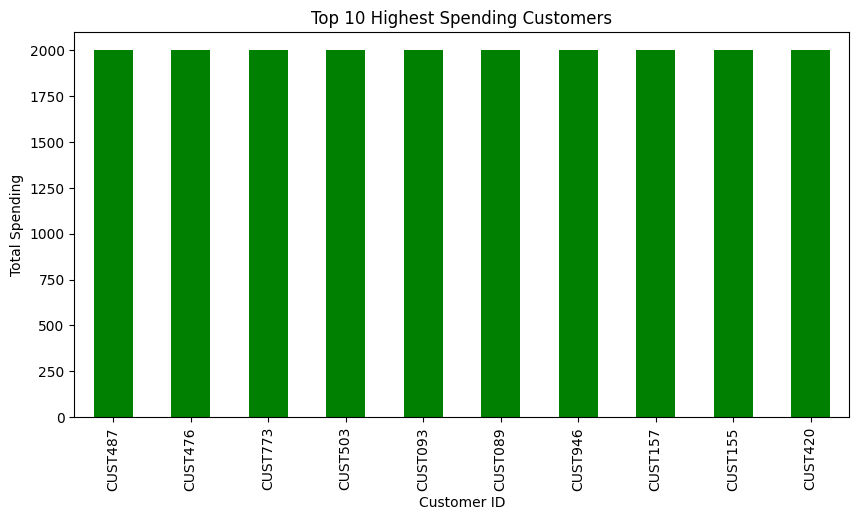

In [45]:
customer_spending = df.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
customer_spending.head(10).plot(kind='bar', color='green')
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.title("Top 10 Highest Spending Customers")
plt.show()


##Product Sales Analysis

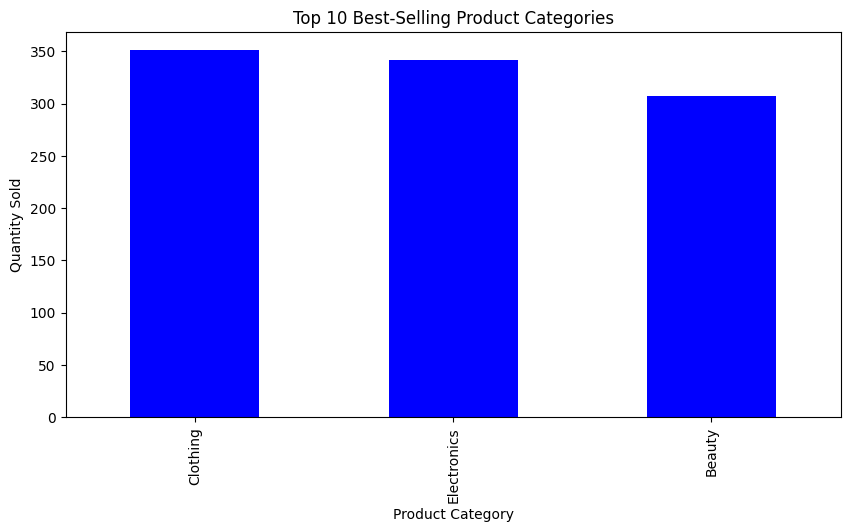

In [47]:
plt.figure(figsize=(10,5))
df["Product Category"].value_counts().head(10).plot(kind='bar', color='blue')
plt.xlabel("Product Category")
plt.ylabel("Quantity Sold")
plt.title("Top 10 Best-Selling Product Categories")
plt.show()

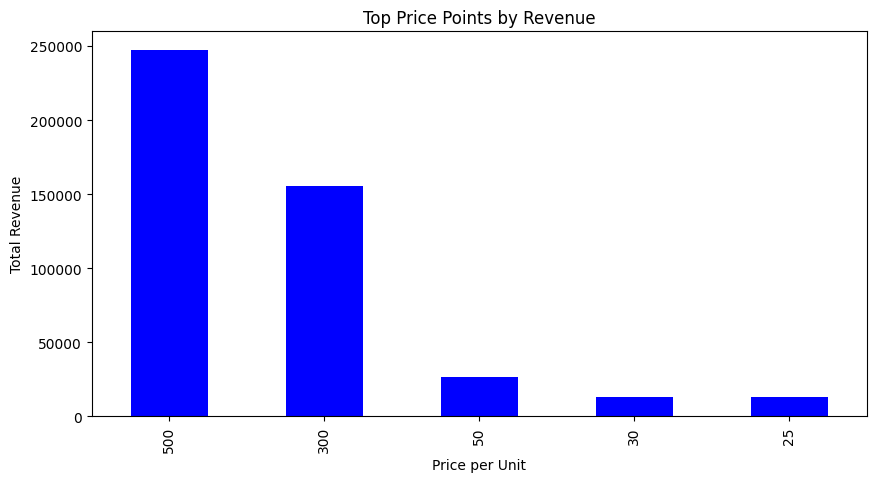

In [59]:
plt.figure(figsize=(10,5))
top_10_prices = df.groupby("Price per Unit")["Total Amount"].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='blue')
plt.xlabel("Price per Unit")
plt.ylabel("Total Revenue")
plt.title("Top Price Points by Revenue")
plt.show()

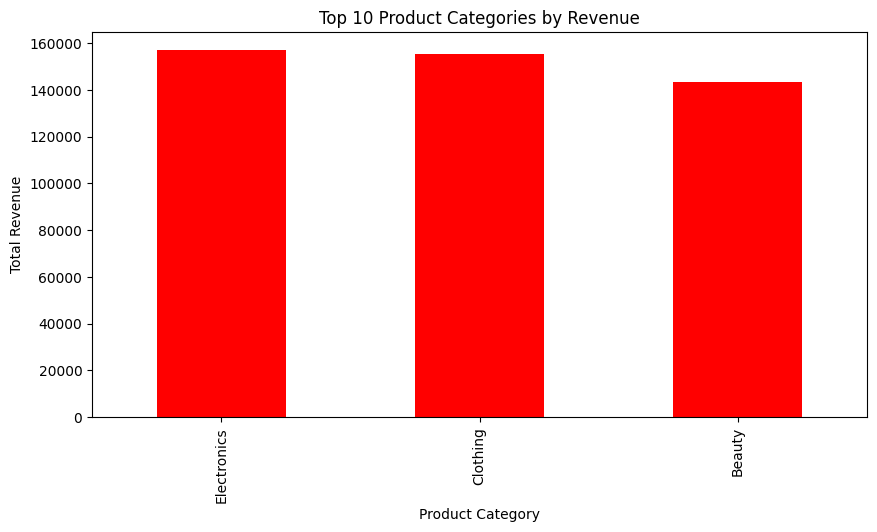

In [48]:
category_revenue = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
category_revenue.head(10).plot(kind='bar', color='red')
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.title("Top 10 Product Categories by Revenue")
plt.show()

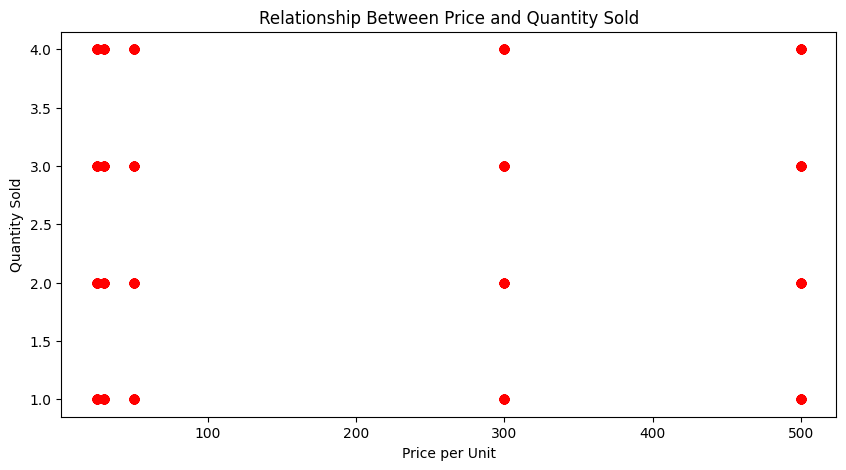

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(df["Price per Unit"], df["Quantity"], alpha=0.5, color='red')
plt.xlabel("Price per Unit")
plt.ylabel("Quantity Sold")
plt.title("Relationship Between Price and Quantity Sold")
plt.show()